In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [6]:
# sử dụng LabelEcoder
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df['species_num'] = encoder.fit_transform(df['species'])

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [10]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


In [11]:
df['species_num'].value_counts()

2    50
1    50
0    50
Name: species_num, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(columns=['species', 'species_num'])
y = df['species_num']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LogisticRegression(solver='newton-cg', multi_class='multinomial')

In [24]:
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [25]:
yhat_test = model.predict(X_test)

In [26]:
print('Prediction accuracy score:', model.score(X_test, y_test) *100 ,'%')

Prediction accuracy score: 100.0 %


In [27]:
X_test.shape

(30, 4)

In [28]:
df_pred = pd.DataFrame({
    'Actual': y_test,
    'Prediction': yhat_test
})

In [29]:
df_pred.head()

,Actual,Prediction
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1


In [30]:
#sepal_length	sepal_width	petal_length	petal_width
X_new = [[4.8, 3.2, 1.7, 0.28]]
yhat_new = model.predict(X_new)
yhat_new

array([0])

In [31]:
yhat_new_proba = model.predict_proba(X_new)
yhat_new_proba

array([[9.51320476e-01, 4.86791219e-02, 4.01822344e-07]])

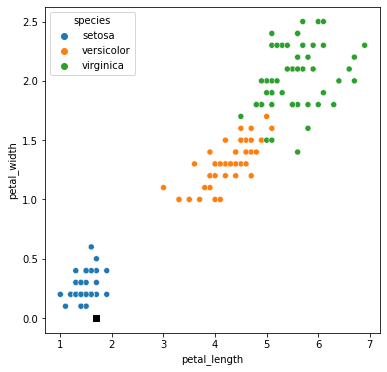

In [32]:
# trực quan hóa kết quả
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.scatter(X_new[0][2], yhat_new, color='k', marker='s')
plt.show()